<a href="https://colab.research.google.com/github/Bhawesh-Agrawal/Segmentation/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Amazon Customer Reviews
**Author:** Team Names
**Date:** July 20, 2025

## Analysis on category Household and Personal_Care

## 1. Introduction

### Business Problem
The goal of this project is to analyze customer reviews for the "Household & Personal Care" category on Amazon. We aim to understand the key drivers of customer satisfaction, identify top products, and explore what makes a review helpful to others.

### Key Questions
* What is the overall distribution of product ratings?
* Is there a relationship between a product's price and its average rating?
* What are the most common topics mentioned in positive vs. negative reviews?

### Data Source
The data used in this analysis is comprised of two datasets sourced from a public repository:
* **Reviews Data:** Contains individual customer reviews, ratings, and helpfulness votes.
* **Metadata:** Contains product information like price, brand, and features.

## 2. Setup & Imports

In [ ]:
# --- Core Libraries ---
import pandas as pd
import numpy as np

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- Settings ---
# Set a consistent style for all plots
sns.set_style('whitegrid')
print("Libraries imported successfully.")

Libraries imported successfully.


## ⚠️ Important: Required Setup

Before you run this notebook, please follow these essential steps to ensure the dataset loads correctly:

1.  **Create a Shortcut to the Dataset**: Go to the dataset at the following link: **https://drive.google.com/drive/folders/1f4r6r0JYd3K8_u0hASJzCVbAUSC67kPz?usp=sharing**.
Right-click on the dataset folder/file and select **"Add shortcut to Drive"**.

2.  **Place Shortcut in "My Drive"**: When prompted for a location, select **"My Drive"**. It's crucial that the shortcut is placed in the main (root) folder of your Google Drive and not inside any other folders.

3.  **Connect Your Drive**: After creating the shortcut, run the first code cell below to connect and mount your Google Drive.

Following these steps will prevent file path errors and ensure the notebook runs smoothly.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Data Loading & Inspection


First, we load the two datasets into pandas DataFrames and then merge them on the `parent_asin` key to create a unified dataset for analysis.

In [ ]:
#Health and Personal Care Review Dataset

import json
import pandas as pd

file = "/content/drive/MyDrive/Dataset Segmentation/Health_and_Personal_Care.jsonl"
data = []
# Open and read the JSONL file line by line
with open(file, 'r') as fp:
    for line in fp:
        # Parse each line as a JSON object and append to a list
        data.append(json.loads(line.strip()))

# Convert the list of JSON objects into a pandas DataFrame
df = pd.DataFrame(data)

In [3]:
# meta data

import json
import pandas as pd
import gzip # Import the gzip library

file = "/content/drive/MyDrive/Dataset Segmentation/meta_Health_and_Personal_Care.jsonl.gz"
data = []
# Use gzip.open to read the compressed .jsonl.gz file
with gzip.open(file, 'r') as fp:
    # Decode each line from bytes to string before loading as JSON
    for line in fp:
        data.append(json.loads(line.strip().decode('utf-8')))

# Convert the list of JSON objects into a pandas DataFrame for metadata
meta_df = pd.DataFrame(data) # Changed df to meta_df

In [ ]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4.0,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1580950175902,3,True
1,5.0,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,1604354586880,3,True
2,5.0,Fantastic,I have been suffering a couple months with hee...,[],B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1563966838905,0,True
3,4.0,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,1662258542725,7,True
4,1.0,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,1642722787262,0,True


In [ ]:
meta_df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,Health & Personal Care,Silicone Bath Body Brush Exfoliator Shower Bac...,3.9,7,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Rzoeox,[],{'Package Dimensions': '15 x 3.3 x 1.5 inches;...,B07V346GZH,None
1,Health & Personal Care,"iPhone 7 Plus 8 Plus Screen Protector, ZHXIN T...",3.8,2,[Tough and Robust: Like all 78X screen protect...,[Features: 2.5D Arc Edge Treatment: The edge i...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],ZHXIN,[],"{'Brand': 'ZHXIN', 'Compatible Devices': 'Cell...",B075W927RH,None
2,Health & Personal Care,Zig Zag Rolling Machine 70mm Size With FREE BO...,3.9,7,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],None,[],{'Package Dimensions': '4.1 x 1.8 x 0.3 inches...,B01FB26VKY,None
3,Health & Personal Care,Sting-Kill Disposable Wipes 8 Each ( Pack of 5),4.1,6,[],"[effective on stings and bites from bees, wasp...",21.37,[{'thumb': 'https://m.media-amazon.com/images/...,[],Sting-kill,[],"{'Brand': 'Sting-kill', 'Item Form': 'Wipe', '...",B01IAI29RU,None
4,Health & Personal Care,Heated Eyelash Curler Mini Portable Electric E...,3.3,8,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],BiBOSS,[],{'Package Dimensions': '6.1 x 3.1 x 1.9 inches...,B08CMN38RC,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494121 entries, 0 to 494120
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             494121 non-null  float64
 1   title              494121 non-null  object 
 2   text               494121 non-null  object 
 3   images             494121 non-null  object 
 4   asin               494121 non-null  object 
 5   parent_asin        494121 non-null  object 
 6   user_id            494121 non-null  object 
 7   timestamp          494121 non-null  int64  
 8   helpful_vote       494121 non-null  int64  
 9   verified_purchase  494121 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 34.4+ MB


This dataset provides a comprehensive collection of **494,121 customer reviews**. Each review is described by 10 distinct attributes, offering deep insights into customer opinions and product details. All columns are fully populated, with no missing values.

***

### Dataset Columns Description

* **`rating`**: A numerical score, stored as a `float`, representing the star rating provided by the customer.
* **`title`**: The summary or title of the review, stored as text (`object`).
* **`text`**: The full, detailed body of the customer's review, also stored as text (`object`).
* **`images`**: Contains information about any images submitted with the review (`object`).
* **`asin`**: The Amazon Standard Identification Number, a unique block of 10 letters and/or numbers that identify items. This is a text-based ID (`object`).
* **`parent_asin`**: The ASIN of the parent product. This is used to group together different variations of a product (e.g., different colors or sizes). It is also a text-based ID (`object`).
* **`user_id`**: A unique identifier for each user who submitted a review (`object`).
* **`timestamp`**: The time the review was submitted, represented as a Unix timestamp (`integer`).
* **`helpful_vote`**: An integer count of how many other users found the review to be helpful.
* **`verified_purchase`**: A boolean value (`True` or `False`) that indicates whether the review comes from a purchase verified by Amazon.

In [ ]:
# Display information about the meta_df DataFrame
# This includes the index dtype and columns, non-null values and their counts, and dtypes
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60293 entries, 0 to 60292
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    60293 non-null  object 
 1   title            60293 non-null  object 
 2   average_rating   60293 non-null  float64
 3   rating_number    60293 non-null  int64  
 4   features         60293 non-null  object 
 5   description      60293 non-null  object 
 6   price            10536 non-null  float64
 7   images           60293 non-null  object 
 8   videos           60293 non-null  object 
 9   store            57947 non-null  object 
 10  categories       60293 non-null  object 
 11  details          60293 non-null  object 
 12  parent_asin      60293 non-null  object 
 13  bought_together  0 non-null      object 
dtypes: float64(2), int64(1), object(11)
memory usage: 6.4+ MB


This dataset contains **60,293 entries**, each representing a unique product. The information for each product is spread across **14 columns**. However, there are significant gaps in the data, particularly in the `price` and `store` columns, and the `bought_together` column is entirely empty.

***

### Column Descriptions

* **`main_category`**: The primary product category (text).
* **`title`**: The title or name of the product (text).
* **`average_rating`**: The average user rating for the product (numeric, `float`).
* **`rating_number`**: The total count of ratings received (numeric, `integer`).
* **`features`**: A list or description of the product's key features (text).
* **`description`**: A detailed text description of the product.
* **`price`**: The price of the product (numeric, `float`). Note that this column has a large number of **missing values** (only 10,536 non-null entries).
* **`images`**: Information related to product images, likely a list of URLs or identifiers (text).
* **`videos`**: Information related to product videos (text).
* **`store`**: The name of the seller or store. This column also has **missing values** (57,947 non-null entries).
* **`categories`**: The full list or path of categories the product belongs to (text).
* **`details`**: A collection of specific product details, often structured as key-value pairs (text).
* **`parent_asin`**: The unique identifier for the parent product, used to group different product variations.
* **`bought_together`**: Intended to list items frequently purchased with the product. This column is **completely empty** (0 non-null entries).

## 4. Data Cleaning

In [ ]:
# Merge the two dataframes
reviews_df = pd.DataFrame(df)
merge_df = pd.merge(reviews_df, meta_df, on='parent_asin', how='left')
print("--- Initial Data Overview ---")
print(merge_df.info())

--- Initial Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494121 entries, 0 to 494120
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             494121 non-null  float64
 1   title_x            494121 non-null  object 
 2   text               494121 non-null  object 
 3   images_x           494121 non-null  object 
 4   asin               494121 non-null  object 
 5   parent_asin        494121 non-null  object 
 6   user_id            494121 non-null  object 
 7   timestamp          494121 non-null  int64  
 8   helpful_vote       494121 non-null  int64  
 9   verified_purchase  494121 non-null  bool   
 10  main_category      494121 non-null  object 
 11  title_y            494121 non-null  object 
 12  average_rating     494121 non-null  float64
 13  rating_number      494121 non-null  int64  
 14  features           494121 non-null  object 
 15  description        49

## 5. Exploratory Data Analysis

### Analyzing Overall Customer Sentiment

This chart provides a high-level summary of customer sentiment by visualizing the frequency of each star rating. It allows for a quick assessment of whether products are generally well-received (a majority of 4 and 5-star reviews) or are facing issues (a notable number of 1 and 2-star reviews). This is crucial for gauging overall satisfaction and spotting potential red flags in the dataset at a glance.

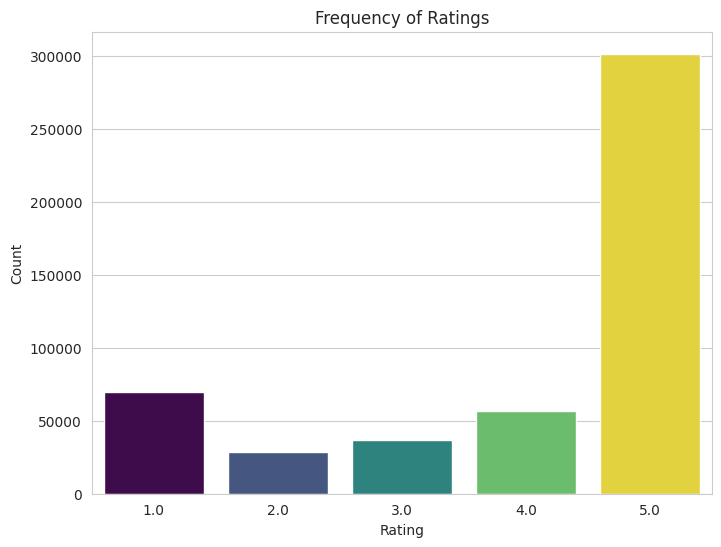

In [ ]:
# freq of ratings
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
plt.figure(figsize=(8, 6))
# Generate a countplot to show the frequency of each rating value
sns.countplot(x='rating', data=df, palette='viridis', hue='rating', legend=False)
# Set the title of the plot
plt.title('Frequency of Ratings')
# Set the label for the x-axis
plt.xlabel('Rating')
# Set the label for the y-axis
plt.ylabel('Count')
# Display the plot
plt.show()

### Product Quality Distribution

This histogram shows the distribution of **average ratings** across all products in the catalog. It helps understand the overall quality of the inventory by revealing how many products fall into different rating brackets (e.g., high, medium, or low-rated). This is useful for gauging the general market perception and identifying if the catalog is skewed towards high-quality or poorly-performing items.

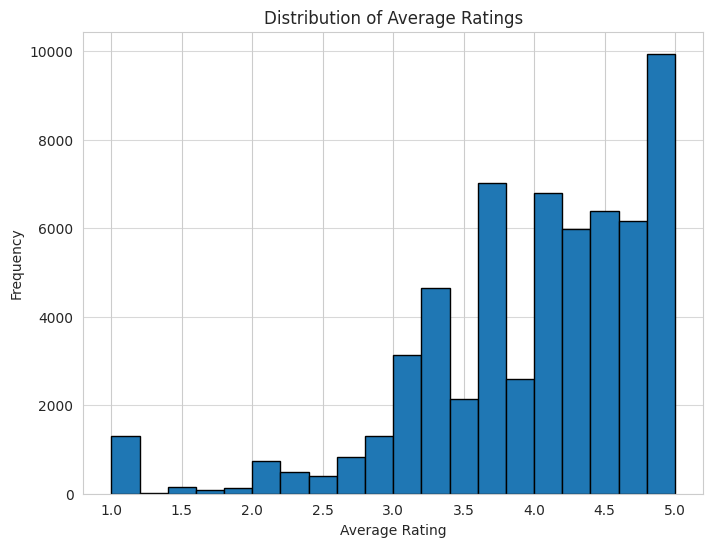

In [ ]:
#distribution of avg ratings
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(meta_df['average_rating'], bins=20, edgecolor='black')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Analyzing Product Price Points

This histogram illustrates the **distribution of product prices**, helping to identify the most common price brackets across the catalog. This is key to understanding the market positioning of the inventory, revealing whether it leans towards budget-friendly, mid-range, or luxury goods. The plot provides a clear view of the overall pricing strategy and helps to easily spot outliers.

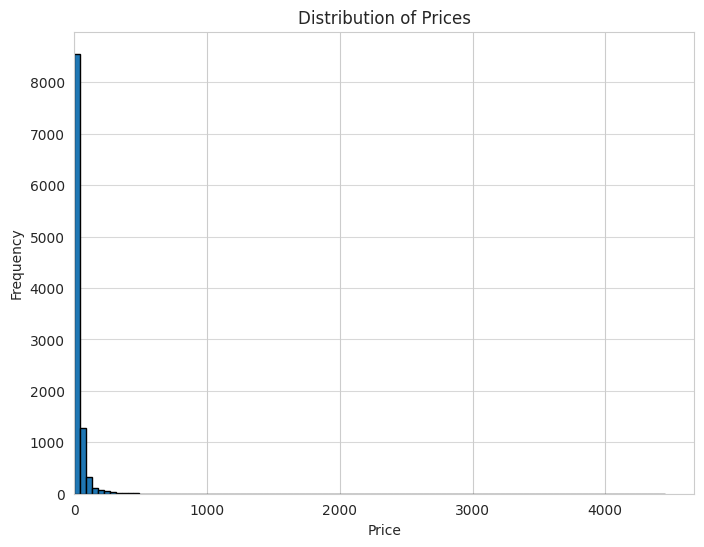

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(meta_df['price'].dropna(), bins=100, edgecolor='black') # Increased bins for more detail
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xlim(0,) # Set x-axis limit to start from 0
plt.show()

### Gauging Review Helpfulness

This histogram shows the distribution of "helpful votes" across all reviews, revealing how review utility is spread. It's common for most reviews to have zero or very few helpful votes, so this chart quickly confirms that pattern and highlights the small number of highly influential reviews. Analyzing this distribution is the first step toward understanding what makes a review truly valuable to other customers.

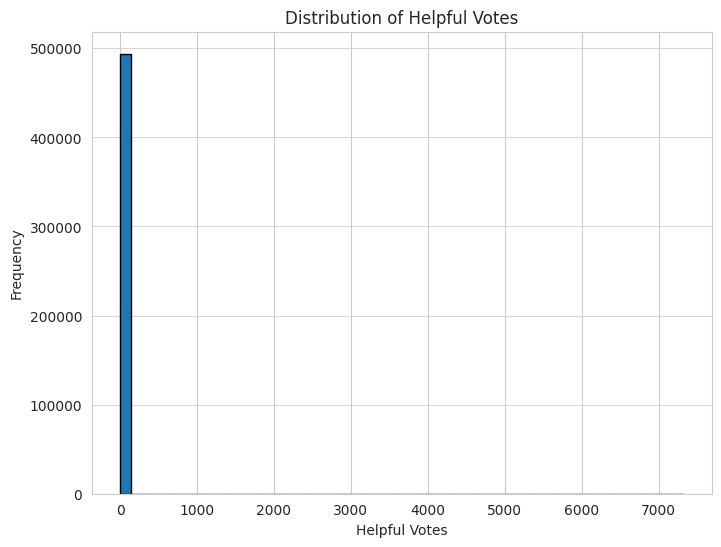

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['helpful_vote'], bins=50, edgecolor='black') # Using a reasonable number of bins
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Exploring the Price vs. Quality Relationship

This scatter plot is designed to investigate the relationship between a product's price and its perceived quality (the average rating). Each point on the plot represents a single product, positioned according to its price and rating. This visualization helps to answer key business questions, such as "Do more expensive products get better ratings?" and allows for the easy identification of market segments, like high-quality budget items or potentially overpriced luxury goods.

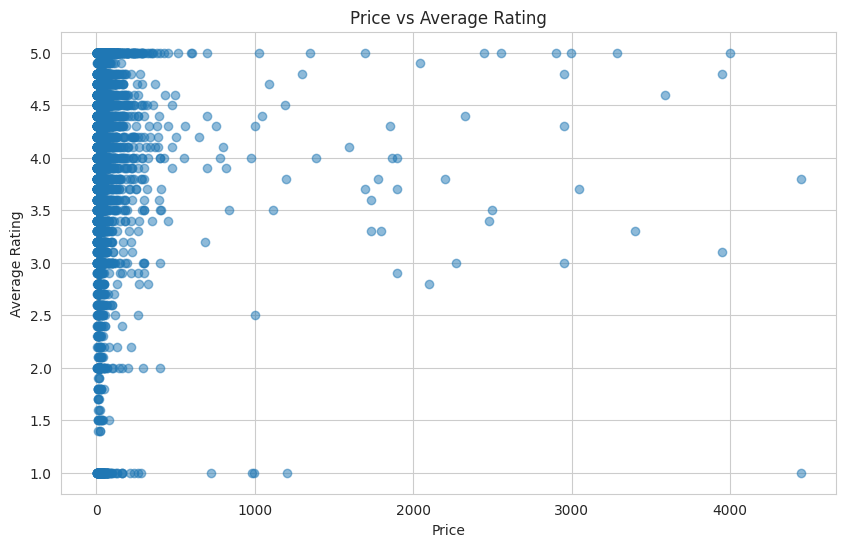

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(meta_df['price'], meta_df['average_rating'], alpha=0.5)
plt.title('Price vs Average Rating')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


### Identifying Most Popular Products

This horizontal bar chart identifies the **most frequently reviewed products** in the dataset, which serves as a strong indicator of their popularity or high sales volume. The review counts are displayed on a **scaled (logarithmic) axis** to ensure that even products with vast differences in review numbers can be compared effectively. This visualization is crucial for pinpointing the most significant products that drive the most customer interaction and have the largest footprint in the catalog.

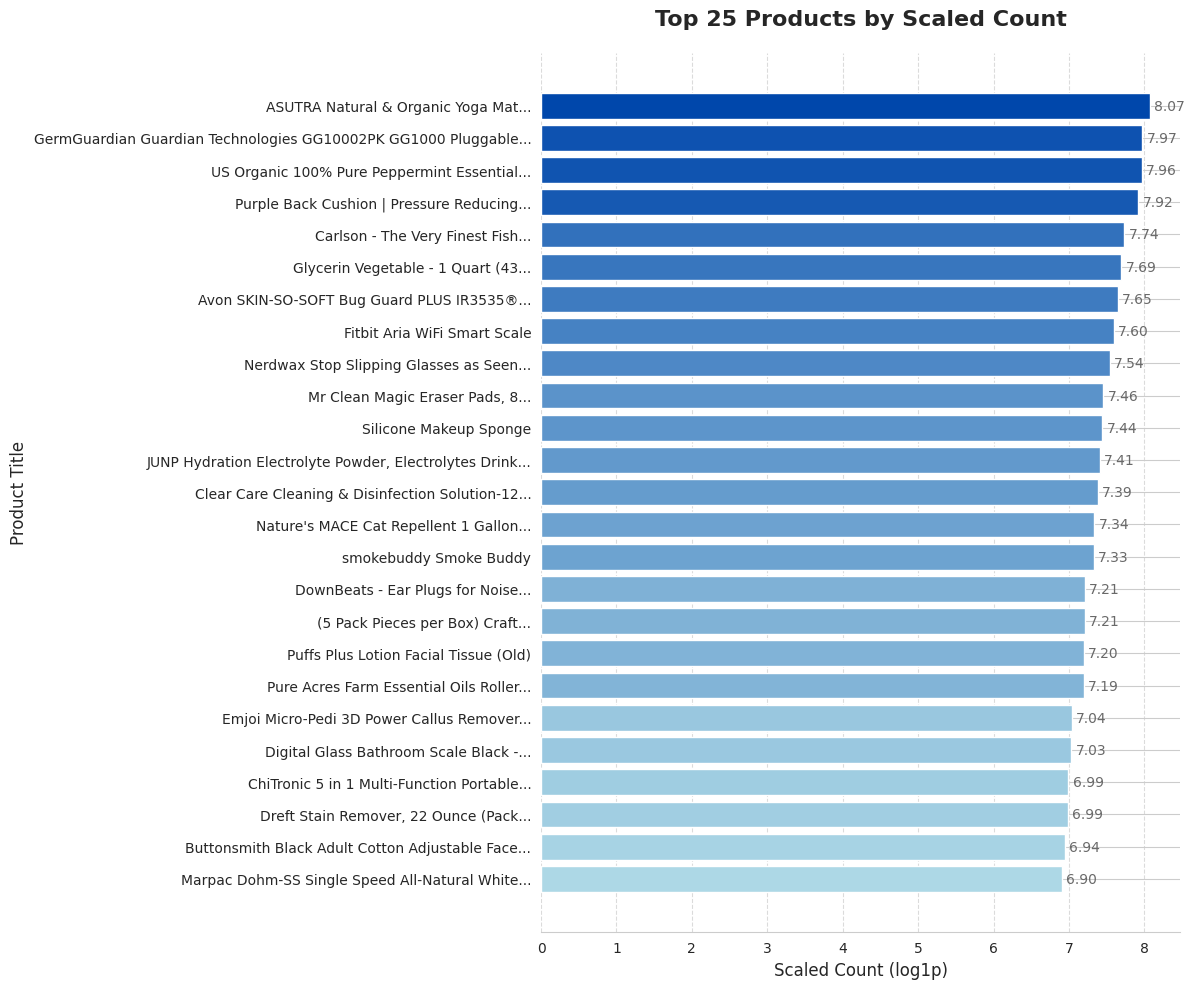

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

asin_counts = df['parent_asin'].value_counts()
scaled_asin_counts = np.log1p(asin_counts)
asin_to_title_map = meta_df[meta_df['parent_asin'].isin(asin_counts.index)].set_index('parent_asin')['title'].to_dict()

N = 25
top_n_counts = scaled_asin_counts.nlargest(N)

def shorten_title(title, num_words=6):
    """Shortens a string to a specified number of words."""
    words = str(title).split()
    if len(words) > num_words:
        return ' '.join(words[:num_words]) + '...'
    return ' '.join(words)

top_n_titles = [shorten_title(asin_to_title_map.get(asin, str(asin))) for asin in top_n_counts.index]

fig, ax = plt.subplots(figsize=(12, 10))

cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ["#ADD8E6", "#0047AB"])
norm = mcolors.Normalize(vmin=top_n_counts.min(), vmax=top_n_counts.max())
colors = cmap(norm(top_n_counts.values))

# Use a horizontal bar chart (barh)
bars = ax.barh(
    range(N),
    top_n_counts.values[::-1],
    color=colors[::-1]
)

ax.set_yticks(range(N))
ax.set_yticklabels(top_n_titles[::-1])

ax.bar_label(bars, fmt='%.2f', padding=3, color='dimgray', fontsize=10)
ax.set_title(f'Top {N} Products by Scaled Count', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Scaled Count (log1p)', fontsize=12)
ax.set_ylabel('Product Title', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Analyzing the Impact of Images on Ratings

This count plot compares the distribution of ratings for two distinct groups: reviews that contain images and reviews that do not. The purpose is to investigate whether the presence of visual evidence correlates with the review's sentiment. This analysis can reveal if customers are more likely to upload images when they are highly satisfied or, conversely, when they are lodging a complaint about a faulty product.

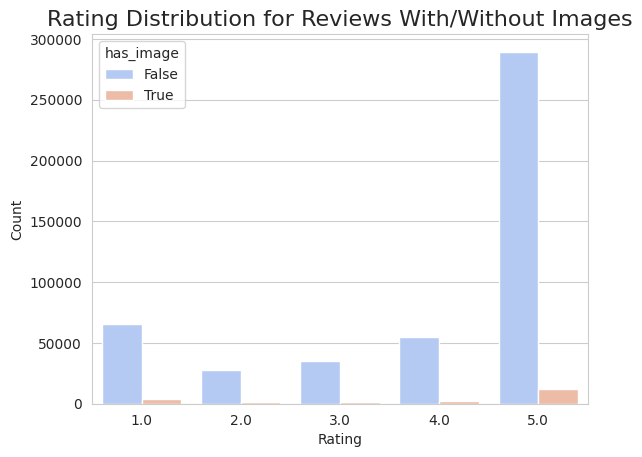

In [ ]:
df['has_image'] = df['images'].apply(lambda x: len(x) > 0 if isinstance(x, list) else False)
sns.countplot(data=df, x='rating', hue='has_image', palette='coolwarm')
plt.title('Rating Distribution for Reviews With/Without Images', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Uncovering Relationships Between Numerical Features

This **correlation heatmap** provides a concise visual summary of the linear relationships between key numerical variables like price, ratings, and helpful votes. Each cell shows the correlation coefficient between two features, with warm colors indicating a positive relationship (as one variable increases, the other tends to increase) and cool colors indicating a negative one. This allows for a quick scan to identify significant associations, such as whether higher prices are linked to higher ratings, which can guide further, more detailed analysis.

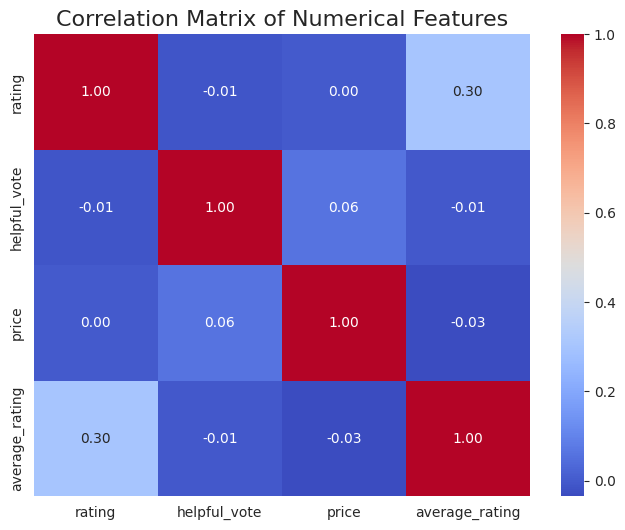

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

numerical_cols = ['rating', 'helpful_vote', 'price', 'average_rating']

heatmap_df = merge_df[numerical_cols].dropna()

correlation_matrix = heatmap_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

### Identifying Key Themes in Customer Feedback

This word cloud visually summarizes the most frequent terms found within customer reviews, with the size of each word corresponding to its frequency. By creating separate clouds for positive (5-star) and negative (1-star) reviews, we can instantly identify the key themes driving customer sentiment. This helps to quickly grasp what customers love most about a product or, conversely, what the most common complaints and issues are.

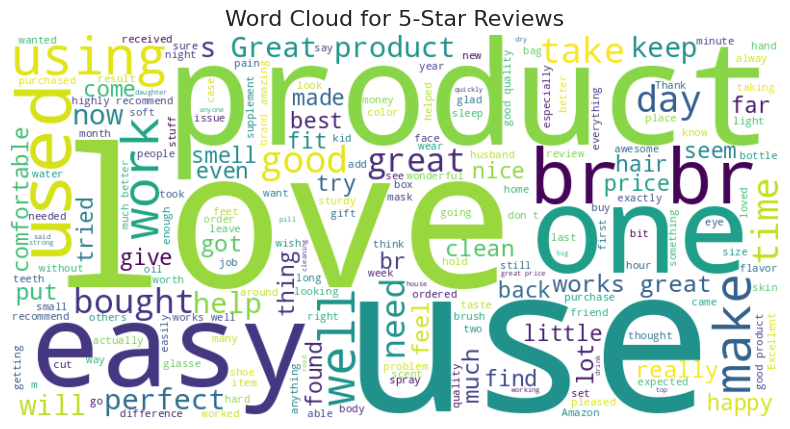

In [ ]:
from wordcloud import WordCloud

positive_text = ' '.join(df[df['rating'] == 5]['text'].dropna())
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 5-Star Reviews', fontsize=16)
plt.show()

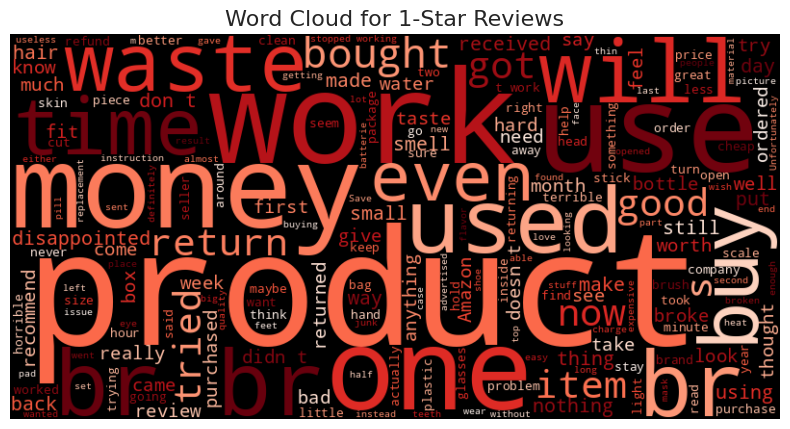

In [ ]:
# Word Cloud for Negative (1-star) Reviews
negative_text = ' '.join(df[df['rating'] == 1]['text'].dropna())
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 1-Star Reviews', fontsize=16)
plt.show()

### Tracking Customer Sentiment Over Time

This line plot shows the trend of average customer ratings on a month-by-month basis. Its purpose is to visualize whether overall customer satisfaction is improving, declining, or staying consistent over time. This analysis is crucial for understanding the long-term perception of a product and for evaluating the impact of changes like feature updates or marketing campaigns.

Generating plot with the following data:
    year_month    rating
0      2001-02  3.000000
1      2001-03  1.000000
2      2001-05  5.000000
3      2001-07  4.000000
4      2001-08  5.000000
..         ...       ...
252    2023-05  3.732867
253    2023-06  3.806569
254    2023-07  3.928205
255    2023-08  3.973333
256    2023-09  3.550000

[257 rows x 2 columns]


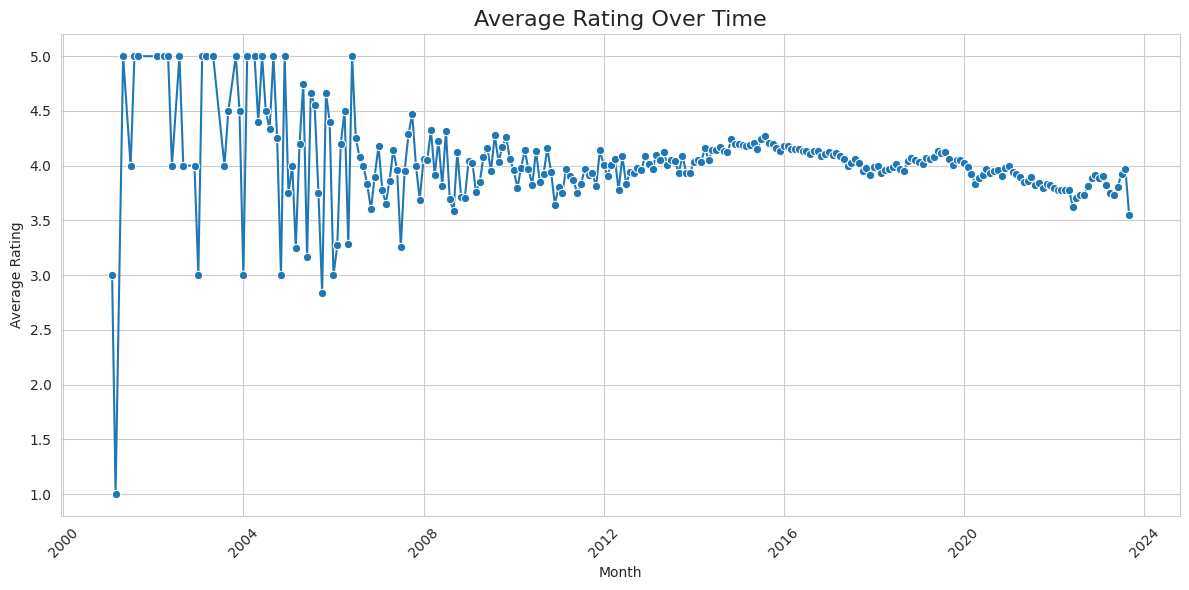

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

df['year_month'] = df['timestamp'].dt.to_period('M')
monthly_avg_rating = df.groupby('year_month')['rating'].mean().reset_index()

if len(monthly_avg_rating) > 1:
    print("Generating plot with the following data:")
    print(monthly_avg_rating)

    plt.figure(figsize=(12, 6))
    # Convert period back to timestamp for plotting
    monthly_avg_rating['year_month'] = monthly_avg_rating['year_month'].dt.to_timestamp()

    sns.lineplot(data=monthly_avg_rating, x='year_month', y='rating', marker='o')

    plt.title('Average Rating Over Time', fontsize=16)
    plt.xlabel('Month')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Plot not generated. Not enough data (fewer than 2 months) to show a trend.")
    print("\nData after grouping:")
    print(monthly_avg_rating)

**------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Analysis of category Electronics

## 1) Importing and Filtering Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Filtering out meta data

We will first filter out the product that are produced after 2020 only. These will help us to know more about the current trend and gain analysis on it

In [15]:
import pandas as pd
import gzip
import json
import os
from datetime import datetime

def filter_and_save_products(file_path: str, output_path: str, start_year: int, force_reprocess: bool = False) -> pd.DataFrame:
    # If the output file already exists and we are not forcing a re-run,
    # load the previously saved data instead of re-processing.
    if not force_reprocess and os.path.exists(output_path):
        print(f"Filtered file found at '{output_path}'. Loading directly.")
        try:
            return pd.read_csv(output_path)
        except Exception as e:
            print(f"Error loading existing file: {e}. Reprocessing...")

    # --- Start of original processing logic ---
    print(f"Starting to process the source file: {file_path}")
    filtered_data = []
    formats_to_try = ["%B %d, %Y", "%B %Y", "%b %d, %Y", "%b %Y"]

    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if (i + 1) % 500000 == 0:
                print(f"Processed {i + 1} lines...")

            try:
                record = json.loads(line)
                date_str = record.get('details', {}).get('Date First Available')

                if date_str:
                    parsed_date = None
                    for fmt in formats_to_try:
                        try:
                            parsed_date = datetime.strptime(date_str, fmt)
                            break
                        except ValueError:
                            continue

                    if parsed_date and parsed_date.year >= start_year:
                        filtered_data.append(record)

            except (json.JSONDecodeError, Exception):
                continue

    print(f"Finished processing. Found {len(filtered_data)} records from {start_year} onwards.")

    if not filtered_data:
        print("Warning: No data matched the filter. Returning an empty DataFrame.")
        return pd.DataFrame()

    df_filtered = pd.DataFrame(filtered_data)

    # --- Save the filtered data for future use ---
    try:
        print(f"Saving filtered data to '{output_path}'...")
        df_filtered.to_csv(output_path, index=False)
        print("Save complete.")
    except Exception as e:
        print(f"Error: Could not save the filtered file. {e}")

    return df_filtered

# --- Example Usage ---
# Define paths and parameters
source_file = "/content/drive/MyDrive/Dataset Segmentation/meta_Electronics.jsonl.gz"
output_file = "/content/drive/MyDrive/Dataset Segmentation/filtered_electronics_2020_onwards.csv"
start_year_filter = 2020

# Call the function. The first time, it will process and save.
# Subsequent runs will load the CSV directly unless you set force_reprocess=True.
try:
    df_filtered = filter_and_save_products(
        file_path=source_file,
        output_path=output_file,
        start_year=start_year_filter
    )

    # Display the first few rows of the resulting DataFrame and its size
    if not df_filtered.empty:
        print("\n--- Filtered DataFrame ---")
        print(f"Shape: {df_filtered.shape}")
except FileNotFoundError:
    print(f"Error: The source file was not found at the specified path: {source_file}")
except Exception as e:
    print(f"An error occurred during execution: {e}")


Filtered file found at '/content/drive/MyDrive/Dataset Segmentation/filtered_electronics_2020_onwards.csv'. Loading directly.

--- Filtered DataFrame ---
Shape: (395143, 16)


### Getting unique product id

In [16]:
import pandas as pd
import os
from IPython.display import display

def extract_and_save_unique_asins(filtered_df: pd.DataFrame, output_path: str):
    print("--- Step 1: Extracting all unique parent_asin values ---")
    if 'parent_asin' not in filtered_df.columns:
        print("Error: 'parent_asin' column not found in the DataFrame.")
        return

    # Extract all unique non-null values from the 'parent_asin' column
    unique_parent_asins = filtered_df['parent_asin'].dropna().unique()
    print(f"Found {len(unique_parent_asins)} unique parent_asin values.")

    # Display the first 10 unique values for a quick check
    print("\n--- First 10 Unique parent_asin Values ---")
    for i, val in enumerate(unique_parent_asins[:10], start=1):
        print(f"{i}. {val}")

    # Save all unique values to a new CSV file
    print("\n--- Step 2: Saving all unique values to CSV ---")
    df_unique_all = pd.DataFrame({'parent_asin': unique_parent_asins})
    try:
        # Ensure the parent directory exists before saving the file
        output_dir = os.path.dirname(output_path)
        if output_dir:
            os.makedirs(output_dir, exist_ok=True)

        df_unique_all.to_csv(output_path, index=False)
        print(f"✅ All unique parent_asin values saved to:\n{output_path}")
    except Exception as e:
        print(f"Error saving unique ASINs file: {e}")
        return

# --- Main Execution Block ---

# Define the output path for the unique ASINs.
# Make sure this path is correct for your Google Drive environment.
unique_asins_output_file = "/content/drive/MyDrive/Dataset Segmentation/unique_parent_asins_all.csv"

# Check if the df_filtered DataFrame exists and is not empty before proceeding.
if 'df_filtered' in locals() and isinstance(df_filtered, pd.DataFrame) and not df_filtered.empty:
    print("--- DataFrame 'df_filtered' found. Proceeding with extraction. ---")
    print(f"Shape: {df_filtered.shape}")

    # Call the function to extract and save unique parent_asins
    extract_and_save_unique_asins(
        filtered_df=df_filtered,
        output_path=unique_asins_output_file
    )
else:
    print("Error: DataFrame 'df_filtered' not found or is empty. Please ensure it is loaded correctly before running this script.")



--- DataFrame 'df_filtered' found. Proceeding with extraction. ---
Shape: (395143, 16)
--- Step 1: Extracting all unique parent_asin values ---
Found 395143 unique parent_asin values.

--- First 10 Unique parent_asin Values ---
1. B089CNGZCW
2. B0BPLX8B2K
3. B0BYBG1PPD
4. B0C2VCWPGY
5. B093N94GPG
6. B094C5ZN1M
7. B08GG5KD6F
8. B0822SL7JX
9. B09M7TH3YC
10. B086MRND6P

--- Step 2: Saving all unique values to CSV ---
✅ All unique parent_asin values saved to:
/content/drive/MyDrive/Dataset Segmentation/unique_parent_asins_all.csv


### Creating a filtered review dataset

It filters out's the reviews whose product doesn't exist in the unique parent asins or product which where launched before 2020.

In [ ]:
import pandas as pd
import json
import time
import os
from IPython.display import display

# 📁 File paths and target configuration
review_file_path = "/content/drive/MyDrive/Dataset Segmentation/Electronics.jsonl"
asin_list_path = "/content/drive/MyDrive/Dataset Segmentation/unique_parent_asins_all.csv"
output_path = "/content/drive/MyDrive/Dataset Segmentation/review_electronics_filtered.csv"
TARGET_MATCHES = 10686802

# ✅ Check if the final output file already exists to avoid re-running the process.
if os.path.exists(output_path):
    print(f"✅ Output file already exists: {output_path}")
    print("Skipping the filtering process. To re-run, please delete the existing file first.")

    # Optional: Display a preview of the existing file
    try:
        print("\n--- Preview of Existing File ---")
        df_existing = pd.read_csv(output_path)
        display(df_existing.head())
    except Exception as e:
        print(f"Could not read the existing file for preview. Error: {e}")

    exit() # Stop the script from running further

# ✅ Load ASIN list
print("\n📦 Loading unique ASIN list...")
try:
    df_unique_asins = pd.read_csv(asin_list_path)
    valid_parent_asins = set(df_unique_asins["parent_asin"].dropna().unique())
    print(f"✅ Loaded {len(valid_parent_asins)} unique parent_asin values\n")
except FileNotFoundError:
    print(f"❗ Error: ASIN list not found at {asin_list_path}. Please check the path.")
    exit()


# ⚙️ Initialize
chunk_size = 10000  # Process 10,000 lines at a time
row_counter = 0
matched_counter = 0
temp_chunk = []
target_reached = False
start_time = time.time()

print("🚀 Starting chunk-wise filtering...\n")

# 🔄 Read JSONL line-by-line
try:
    with open(review_file_path, "r") as f:
        for line in f:
            if target_reached:
                print("🎯 Target reached. Stopping file read.")
                break

            row_counter += 1
            try:
                review = json.loads(line.strip())
                temp_chunk.append(review)
            except json.JSONDecodeError:
                # Silently skip malformed JSON lines to keep the output clean
                continue

            # Process a chunk when it reaches the specified size
            if len(temp_chunk) == chunk_size:
                df_chunk = pd.DataFrame(temp_chunk)
                temp_chunk = []  # Reset chunk

                filtered = df_chunk[df_chunk["parent_asin"].isin(valid_parent_asins)]

                if not filtered.empty:
                    # Check if adding this chunk's matches exceeds the target
                    if matched_counter + len(filtered) >= TARGET_MATCHES:
                        needed = TARGET_MATCHES - matched_counter
                        filtered = filtered.iloc[:needed]
                        target_reached = True
                        print(f"🎯 Target of {TARGET_MATCHES} will be reached in this chunk.")

                    # Append to CSV
                    # The header is only written for the very first chunk
                    header = not os.path.exists(output_path)
                    filtered.to_csv(output_path, mode="a", header=header, index=False)

                    matched_counter += len(filtered)

                print(f"Processed lines: {row_counter}, Total matched: {matched_counter}")

    # 🚀 Process the final leftover chunk if the target hasn't been met
    if temp_chunk and not target_reached:
        print(f"\n📍 Processing final leftover chunk of {len(temp_chunk)} items...")
        df_chunk = pd.DataFrame(temp_chunk)
        filtered = df_chunk[df_chunk["parent_asin"].isin(valid_parent_asins)]

        if not filtered.empty:
            if matched_counter + len(filtered) >= TARGET_MATCHES:
                needed = TARGET_MATCHES - matched_counter
                filtered = filtered.iloc[:needed]
                target_reached = True

            header = not os.path.exists(output_path)
            filtered.to_csv(output_path, mode="a", header=header, index=False)
            matched_counter += len(filtered)

except FileNotFoundError:
    print(f"❗ Error: Review file not found at {review_file_path}. Please check the path.")
    exit()


# 📊 Summary
duration = time.time() - start_time
print("\n📊 --- Filtering Summary ---")
print(f"🧮 Total rows processed : {row_counter}")
print(f"✅ Total matched rows   : {matched_counter}")
print(f"📁 Saved to CSV         : {output_path}")
print(f"⏱️ Time taken           : {duration:.2f} seconds\n")

# 🧾 Preview: Print head of the final filtered CSV
if os.path.exists(output_path):
    print("--- Head of Saved Filtered Review Dataset ---\n")
    try:
        df_filtered_head = pd.read_csv(output_path)
        pd.set_option("display.max_columns", None)
        pd.set_option("display.max_colwidth", None)
        pd.set_option("display.width", 1000)
    except Exception as e:
        print(f"Could not read the final CSV for preview. Error: {e}")
else:
    print("No output file was created.")

✅ Output file already exists: /content/drive/MyDrive/Dataset Segmentation/review_electronics_filtered.csv
Skipping the filtering process. To re-run, please delete the existing file first.

--- Preview of Existing File ---


### Getting top 500 stores

We will be working on a subset of the dataset. For these notebook we have taken the top brands with highest number of review.

In [ ]:
import pandas as pd

meta_filtered_df = pd.read_csv('/content/drive/MyDrive/Dataset Segmentation/filtered_electronics_2020_onwards.csv')
top_500_stores = meta_filtered_df['store'].value_counts().head(500)
top_500_store_names = top_500_stores.index
top_500_store_products_df = meta_filtered_df[meta_filtered_df['store'].isin(top_500_store_names)]

file_path = '/content/drive/MyDrive/Dataset Segmentation/top_500_store_product.csv'
top_500_store_products_df.to_csv(file_path, index=False)

print(f"Filtered data successfully saved to: {file_path}")
print(f"The new DataFrame contains {top_500_store_products_df.shape[0]} rows of product data.")

### Filtering out Review Data based on Top 500 Brand

In [ ]:
import pandas as pd

product_info_df = pd.read_csv('/content/drive/MyDrive/Dataset Segmentation/top_500_store_product.csv')

product_asins_to_match = set(product_info_df['parent_asin'].unique())

reviews_file_path = '/content/drive/MyDrive/Dataset Segmentation/review_electronics_filtered.csv'
output_file_path = '/content/drive/MyDrive/Dataset Segmentation/reviews_for_top_products_chunked.csv'

chunk_size = 500000

is_first_chunk = True

chunk_iterator = pd.read_csv(reviews_file_path, chunksize=chunk_size)

print("Starting to process the large review file in chunks...")

# Loop through each chunk in the file
for i, chunk in enumerate(chunk_iterator):
    # Filter the current chunk
    filtered_chunk = chunk[chunk['parent_asin'].isin(product_asins_to_match)]

    # Check if there are any matching rows in this chunk
    if not filtered_chunk.empty:
        if is_first_chunk:
            # For the first chunk, create the file and write the header
            filtered_chunk.to_csv(output_file_path, mode='w', header=True, index=False)
            is_first_chunk = False # Update the flag
        else:
            # For subsequent chunks, append to the file without the header
            filtered_chunk.to_csv(output_file_path, mode='a', header=False, index=False)

    print(f"Processed chunk {i+1}...")

print("\nProcessing complete!")
print(f"Filtered reviews have been successfully saved to: {output_file_path}")

## 2) Basic Information of Data

In [6]:
products_df = pd.read_csv('/content/drive/MyDrive/Dataset Segmentation/top_500_store_product.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Dataset Segmentation/reviews_for_top_products_chunked.csv')

In [8]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121626 entries, 0 to 121625
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    112576 non-null  object 
 1   title            121624 non-null  object 
 2   average_rating   121626 non-null  float64
 3   rating_number    121626 non-null  int64  
 4   features         121626 non-null  object 
 5   description      121626 non-null  object 
 6   price            62275 non-null   float64
 7   images           121626 non-null  object 
 8   videos           121626 non-null  object 
 9   store            121626 non-null  object 
 10  categories       121626 non-null  object 
 11  details          121626 non-null  object 
 12  parent_asin      121626 non-null  object 
 13  bought_together  0 non-null       float64
 14  subtitle         0 non-null       float64
 15  author           0 non-null       float64
dtypes: float64(5), int64(1), object(10)
me

In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085758 entries, 0 to 2085757
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   rating             float64
 1   title              object 
 2   text               object 
 3   images             object 
 4   asin               object 
 5   parent_asin        object 
 6   user_id            object 
 7   timestamp          int64  
 8   helpful_vote       int64  
 9   verified_purchase  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 145.2+ MB


In [11]:
products_df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Computers,"Gateway 15.6"" FHD Ultra Slim Budget Notebook, ...",4.1,15,"['【Processor】4 Core, 4 Threads, 4MB Cache, up ...","['Processor:', 'Intel® Pentium® Silver N5030 P...",189.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Watch before you order ', 'url': '...",Gateway,"['Electronics', 'Computers & Accessories', 'Co...",{'Standing screen display size': '15.6 Inches'...,B0BYBG1PPD,NaN,NaN,NaN
1,Camera & Photo,VILTROX 24mm F1.8 f/1.8 FE Full-Frame Wide-Ang...,3.9,16,"[""🌼VILTROX FE 24mm lens weighs in at only 12 o...",[],379.00,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Viltrox 24mm F1.8 FE Review', 'url...",VILTROX,"['Electronics', 'Camera & Photo', 'Lenses', 'C...",{'Product Dimensions': '3.35 x 2.76 x 2.76 inc...,B0C2VCWPGY,NaN,NaN,NaN
2,Computers,PNY 1TB PRO Elite Class 10 U3 V30 microSDXC Fl...,4.7,3380,"['Class 10, U3, V30 speed class performance wi...","[""PNY PRO Elite Class 10 U3 V30 microSD Cards ...",109.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Pro-Elite-microSD Promo Video', 'u...",PNY,"['Electronics', 'Computers & Accessories', 'Co...","{'Brand': 'PNY', 'Series': 'P-SDU1TBV32100PRO-...",B0BSQL7M51,NaN,NaN,NaN
3,All Electronics,JBL FLIP 5 - Waterproof Portable Bluetooth Spe...,4.7,762,"[""SOUNDS BETTER THAN EVER - Feel Your Music. F...",['This pre-owned or refurbished product has be...,79.90,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'IMPORTANT Things To Know Before Bu...,Amazon Renewed,"['Electronics', 'Portable Audio & Video', 'Por...","{'Product Dimensions': '4 x 4 x 9 inches', 'It...",B08K2T4JFQ,NaN,NaN,NaN
4,Computers,iCasso Compatible with MacBook Pro 13 Inch Cas...,4.4,3503,['[IMPORTANT!!!]: ONLY Compatible with MacBook...,[],27.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'MacBook Pro case', 'url': 'https:/...",iCasso,"['Electronics', 'Computers & Accessories', 'La...","{'Standing screen display size': '13 Inches', ...",B08GFTPQ5B,NaN,NaN,NaN


In [12]:
reviews_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Does what it is meant to do,"Very easy to configure, fits my 11.6&#34; Alie...",[],B00CPZJP7M,B08YP2F6VG,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,1382629272000,4,True
1,5.0,Great,Fast charging,[],B07PGRR6QN,B08BRJ98H3,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1606084429795,0,True
2,5.0,Wavlink,used once to test it out. . . . .worked great....,[],B07C9RSZFM,B08XBLP2V8,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,1556495697617,0,True
3,5.0,Five Stars,good wiring kit; everything we needed to insta...,[],B000FKP7TY,B09N7SXX1X,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,1474373024000,0,True
4,5.0,Good TV for the price.,The tv overall is really good. Good picture a...,[],B08P4WR6XB,B0945WPX5W,AHCPZDDPHJE3G7M6ST5WGRPLXHOA,1650463455243,0,True


This dataset consists of two related tables detailing electronic products and their corresponding user reviews. The first table is a product catalog of over 121,000 items, containing metadata such as product title, price, store, and descriptive features. The second, much larger table contains over 2 million user reviews, each with a star rating, written text, a user_id, and a timestamp. Both datasets are linked by the parent_asin column, allowing for analysis of specific user feedback in relation to detailed product information.

## Merging the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

products_df = pd.read_csv('/content/drive/MyDrive/Dataset Segmentation/top_500_store_product.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Dataset Segmentation/reviews_for_top_products_chunked.csv')

reviews_df['review_time'] = pd.to_datetime(reviews_df['timestamp'], unit='ms')

merged_df = pd.merge(
    reviews_df,
    products_df,
    on='parent_asin',
    how='left',
    suffixes=('_review', '_product') # Add suffixes to avoid column name conflicts
)

print("Data loaded and merged successfully!")
print(f"Merged DataFrame shape: {merged_df.shape}")
merged_df.head()

Data loaded and merged successfully!
Merged DataFrame shape: (2380818, 26)


,rating,title_review,text,images_review,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,description,price,images_product,videos,store,categories,details,bought_together,subtitle,author
0,5.0,Does what it is meant to do,"Very easy to configure, fits my 11.6&#34; Alie...",[],B00CPZJP7M,B08YP2F6VG,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,1382629272000,4,True,...,"[""NotepalU2 Plus V2 is an updated notebook coo...",48.68,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Havit Laptop Cooling Pad Cooler Fa...,Cooler Master,"['Electronics', 'Computers & Accessories', 'La...",{'Product Dimensions': '13.5 x 10.47 x 2.09 in...,NaN,NaN,NaN
1,5.0,Great,Fast charging,[],B07PGRR6QN,B08BRJ98H3,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1606084429795,0,True,...,[],11.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'SWEGUARD. 3- Pack Fast Charging C-...,CyvenSmart,"['Electronics', 'Computers & Accessories', 'Co...","{'Brand': 'CyvenSmart', 'Connector Type': 'USB...",NaN,NaN,NaN
2,5.0,Wavlink,used once to test it out. . . . .worked great....,[],B07C9RSZFM,B08XBLP2V8,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,1556495697617,0,True,...,[],26.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Wavlink Dual Bay External Hard Dri...,WAVLINK,"['Electronics', 'Computers & Accessories', 'Co...","{'Brand': 'WAVLINK', 'Series': 'WLAMUS-ST341U-...",NaN,NaN,NaN
3,5.0,Wavlink,used once to test it out. . . . .worked great....,[],B07C9RSZFM,B08XBLP2V8,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,1556495697617,0,True,...,[],26.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Wavlink Dual Bay External Hard Dri...,WAVLINK,"['Electronics', 'Computers & Accessories', 'Co...","{'Brand': 'WAVLINK', 'Series': 'WLAMUS-ST341U-...",NaN,NaN,NaN
4,5.0,Five Stars,good wiring kit; everything we needed to insta...,[],B000FKP7TY,B09N7SXX1X,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,1474373024000,0,True,...,[],52.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': '0 Gauge Car Amplifier Installation...,BOSS Audio Systems,"['Car & Vehicle Electronics', 'Vehicle Electro...",{'Package Dimensions': '12.83 x 10.04 x 3.31 i...,NaN,NaN,NaN


## 3) Explatory Data Analysis

### Visualizing Top 50 Stores by Product Count

This Python script performs a frequency analysis to identify and visualize the stores with the most product listings from a given DataFrame. Using the pandas library, it first calculates the number of products for each store and isolates the top 50 for visualization. It then leverages matplotlib and seaborn to generate a well-labeled bar chart displaying the product counts for these top stores, with custom styling for enhanced readability. The script also calculates the total product count for the top 2,000 stores and prints this sum.

The sum of value counts for the top 50 stores is: 196374


/tmp/ipython-input-12-1655693232.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_50_stores.index, y=top_50_stores.values, palette="viridis")


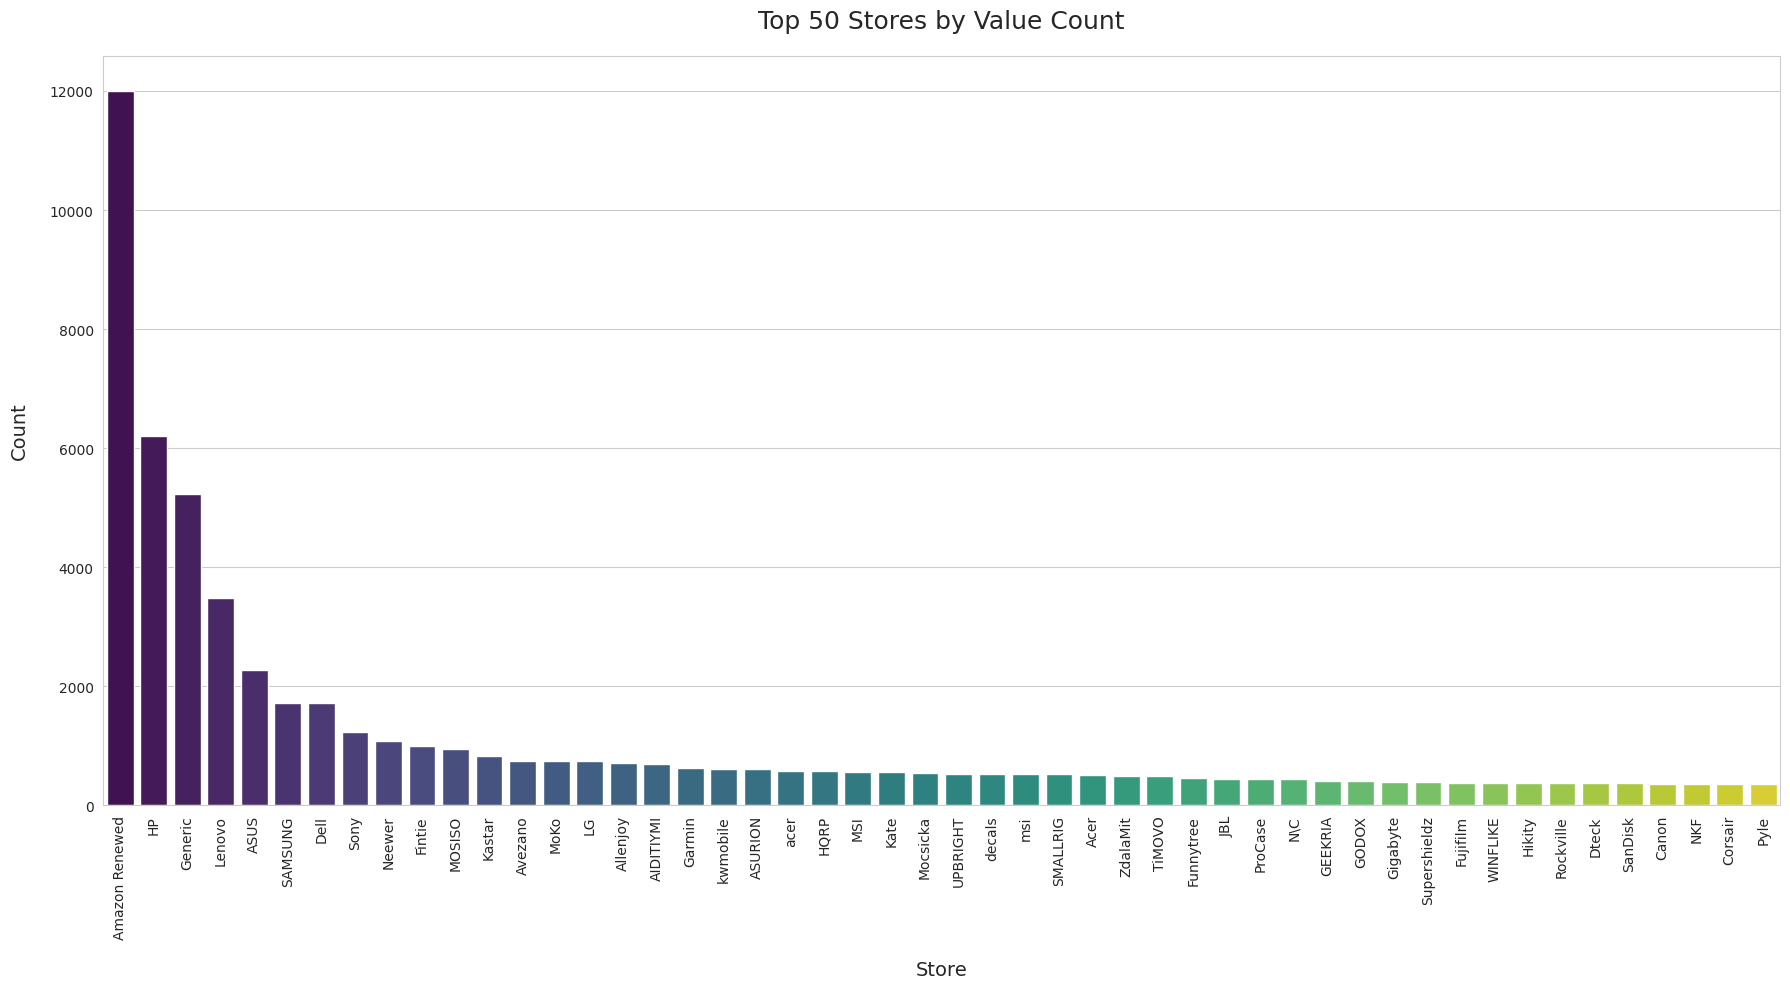

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

store_counts = meta_filtered_df["store"].value_counts()
top_50_stores = store_counts.head(50)
top_100_stores = store_counts.head(2000)

total_top_50_sum = top_100_stores.sum()

print(f"The sum of value counts for the top 50 stores is: {total_top_50_sum}")

sns.set_style("whitegrid")

plt.figure(figsize=(18, 10))

barplot = sns.barplot(x=top_50_stores.index, y=top_50_stores.values, palette="viridis")

plt.xlabel("Store", fontsize=14, labelpad=15)
plt.ylabel("Count", fontsize=14, labelpad=15)
plt.title("Top 50 Stores by Value Count", fontsize=18, pad=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Analyzing Product Price Distribution

This Python script provides a numerical and visual analysis of product prices from a DataFrame. It first uses the pandas .describe() function to calculate and print key summary statistics, including the mean, median, and price range. Subsequently, it leverages seaborn and matplotlib to generate a histogram, visually representing the frequency of different price points and showing the overall shape of the price distribution.

count    62275.000000
mean       199.830171
std        488.492951
min          0.370000
25%         13.085000
50%         29.990000
75%        174.990000
max      44630.000000
Name: price, dtype: float64


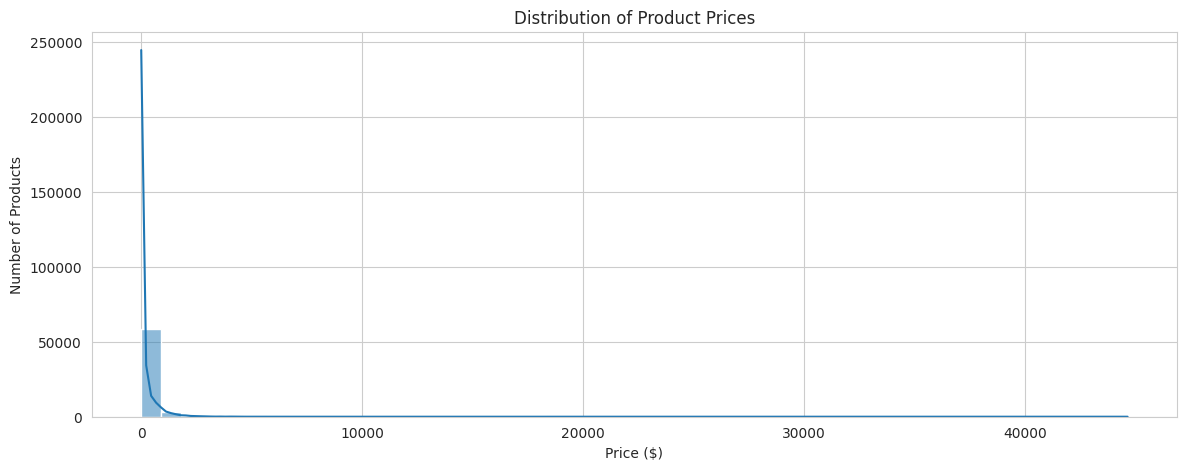

In [8]:
print(products_df['price'].describe())

plt.figure(figsize=(14, 5))
sns.histplot(products_df['price'].dropna(), kde=True, bins=50)
plt.title('Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Products')
plt.show()

### Visualizing the Top 15 Product Categories

This graph reveals the 15 most common product categories within your dataset, ranked by the number of listings. Each horizontal bar represents a specific category, and its length shows how many products fall under it.

In short, this chart provides a clear snapshot of your product catalog's main focus, instantly showing which types of electronics are most dominant.

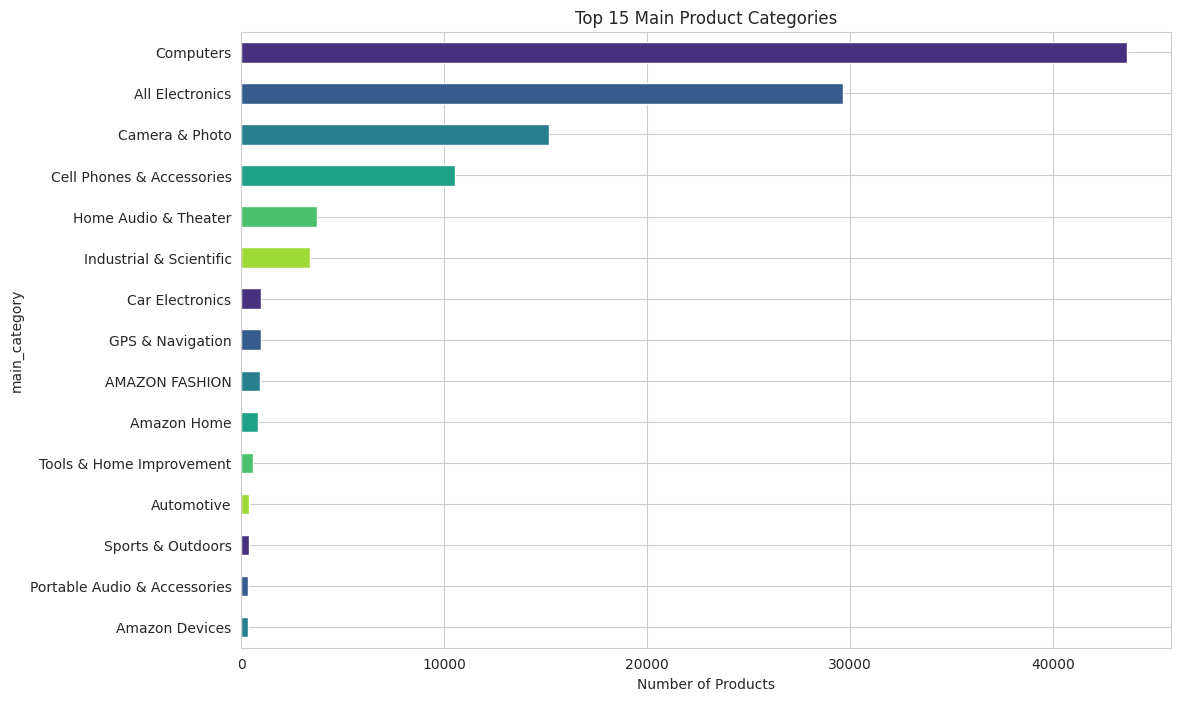

In [9]:
plt.figure(figsize=(12, 8))
products_df['main_category'].value_counts().head(15).plot(kind='barh', color=sns.color_palette("viridis"))
plt.title('Top 15 Main Product Categories')
plt.xlabel('Number of Products')
plt.gca().invert_yaxis() # To show the highest on top
plt.show()

### Top frequently used words in the title

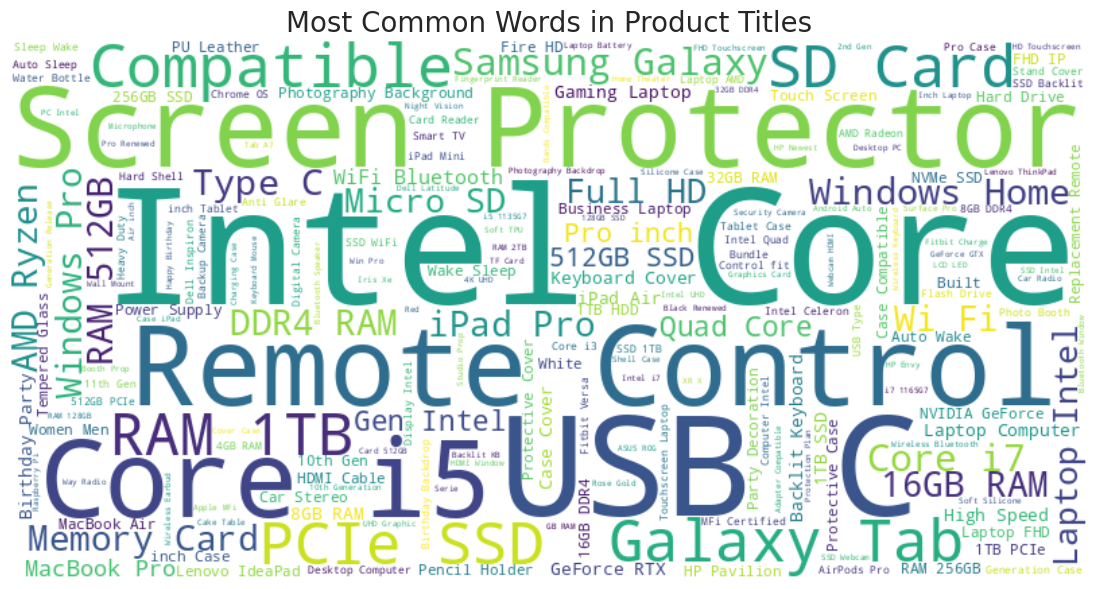

In [11]:
# Ensure titles are strings and handle any missing values
titles_text = ' '.join(products_df['title'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Product Titles', fontsize=20)
plt.show()

### Distribution of Customer Rating

These graph help one to understand what are the common rating of people on these platform and these category

/tmp/ipython-input-12-362412380.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews_df, x='rating', palette='magma')


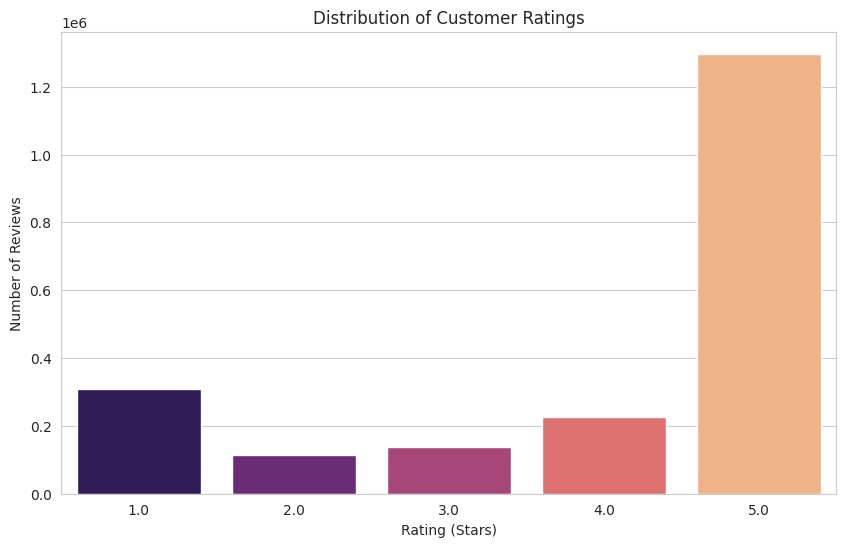

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=reviews_df, x='rating', palette='magma')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Reviews')
plt.show()

### Customer Sentiment over time

These section of graph analyse what are the customer sentiment over the period of time how frequently are they providing postive rating. Here, we can observer the plot starts far before 2020, this is soley due to the dataset. If a page was created way back and updated in 2020 it will have the reviews of the past also

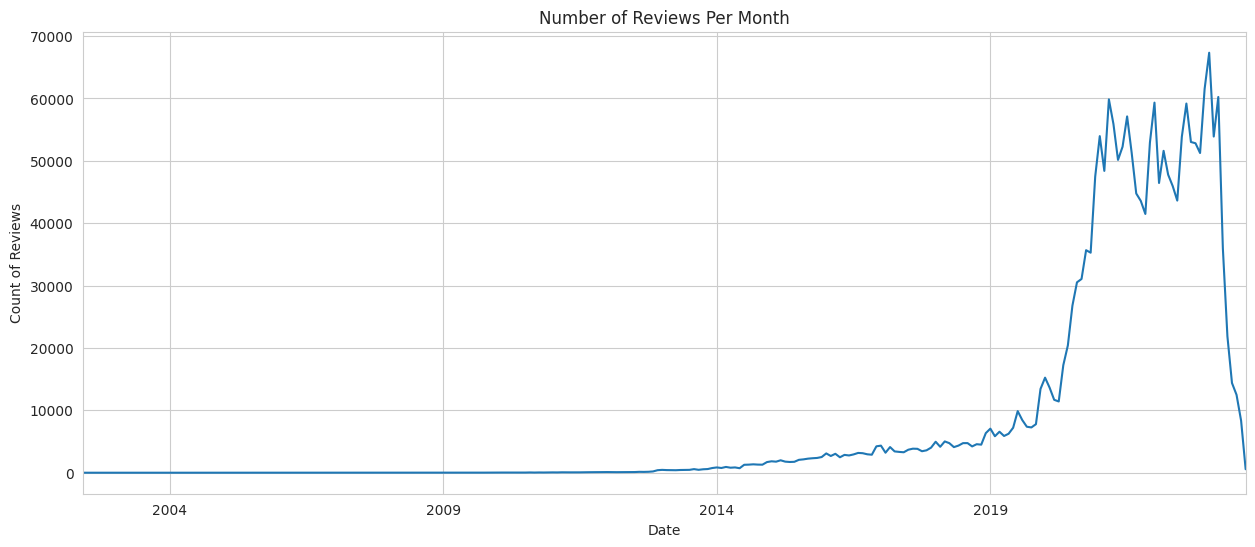

In [14]:
reviews_df.set_index('review_time')['rating'].resample('ME').count().plot(figsize=(15, 6))
plt.title('Number of Reviews Per Month')
plt.ylabel('Count of Reviews')
plt.xlabel('Date')
plt.show()

### Top 15 Categories by Average Rating

/tmp/ipython-input-21-2984404124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_ratings.head(15), x='rating', y='main_category', palette='coolwarm')


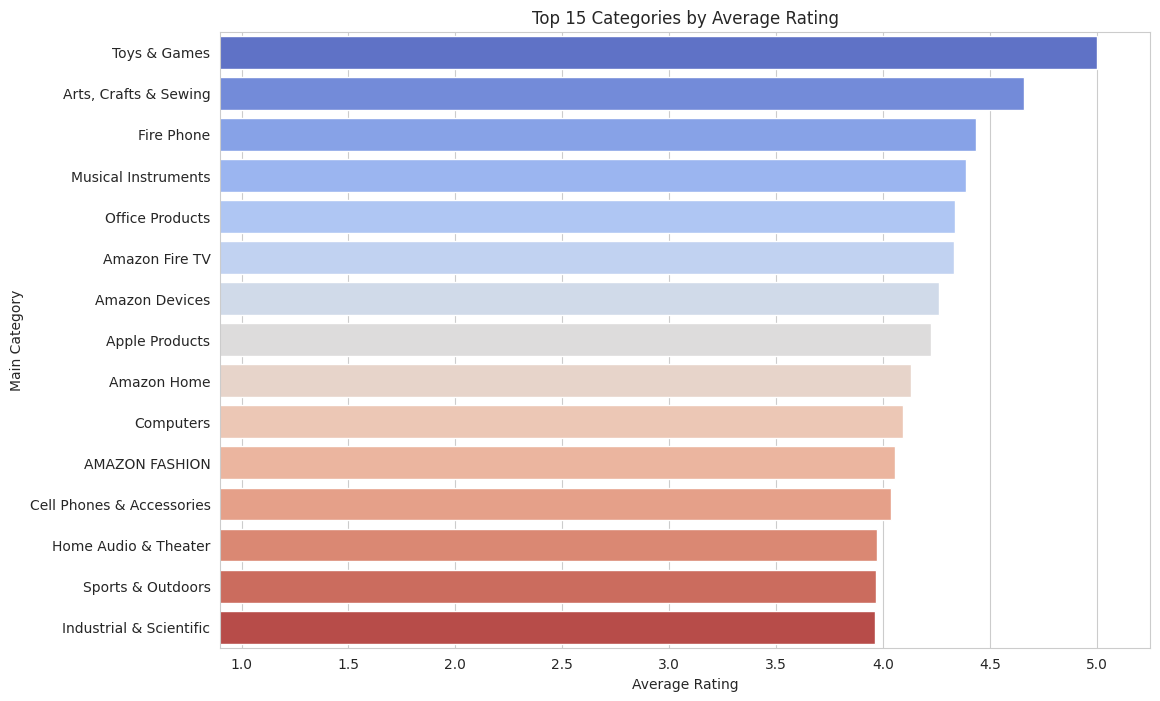

In [21]:
# Calculate average rating per category
category_ratings = merged_df.groupby('main_category')['rating'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=category_ratings.head(15), x='rating', y='main_category', palette='coolwarm')
plt.title('Top 15 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Main Category')
plt.xlim(left=category_ratings['rating'].min() - 0.1) # Adjust x-axis for better view
plt.show()

### Product Rating / Price Bins

/tmp/ipython-input-22-2368263191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='price_bin', y='rating', palette='crest')


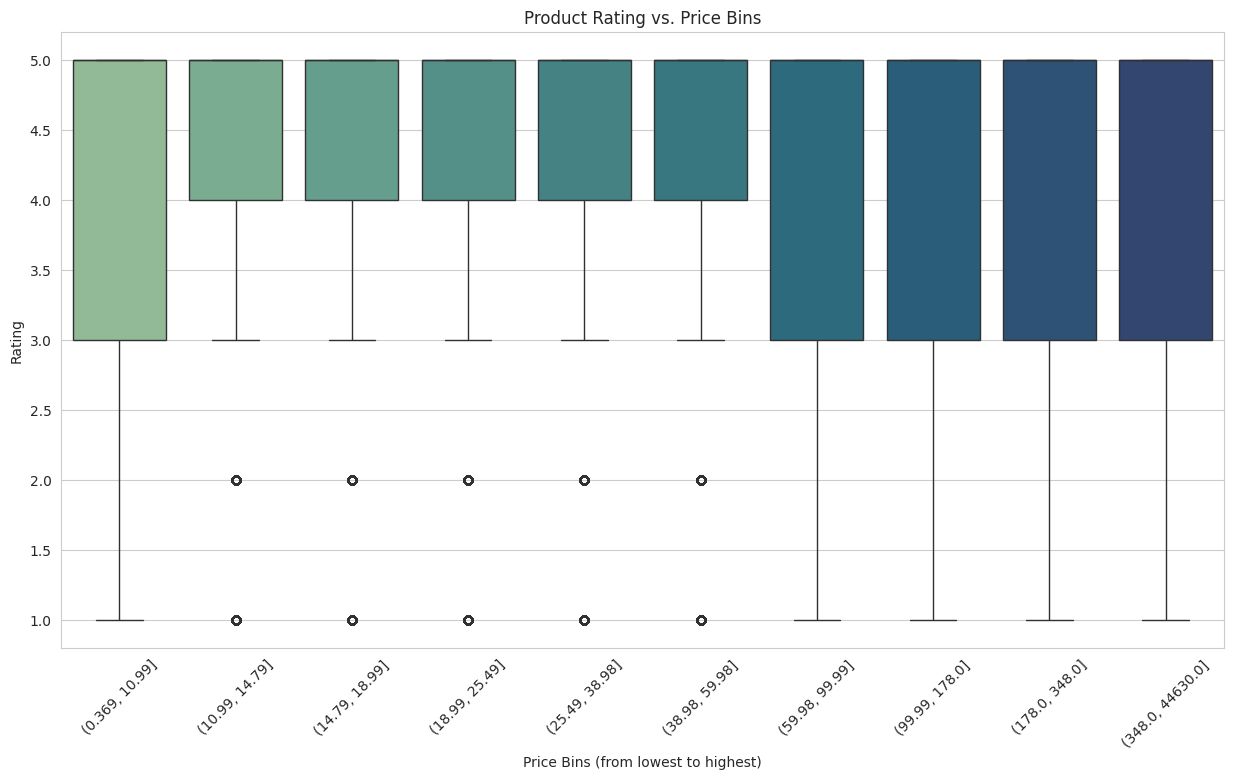

In [22]:
# We can create price bins for a clearer visualization
merged_df['price_bin'] = pd.qcut(merged_df['price'], q=10, duplicates='drop')

plt.figure(figsize=(15, 8))
sns.boxplot(data=merged_df, x='price_bin', y='rating', palette='crest')
plt.title('Product Rating vs. Price Bins')
plt.xlabel('Price Bins (from lowest to highest)')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

### Top 20 Stores by Average rating

/tmp/ipython-input-23-1118439742.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_stores.index, x=top_stores.values, palette='rocket')


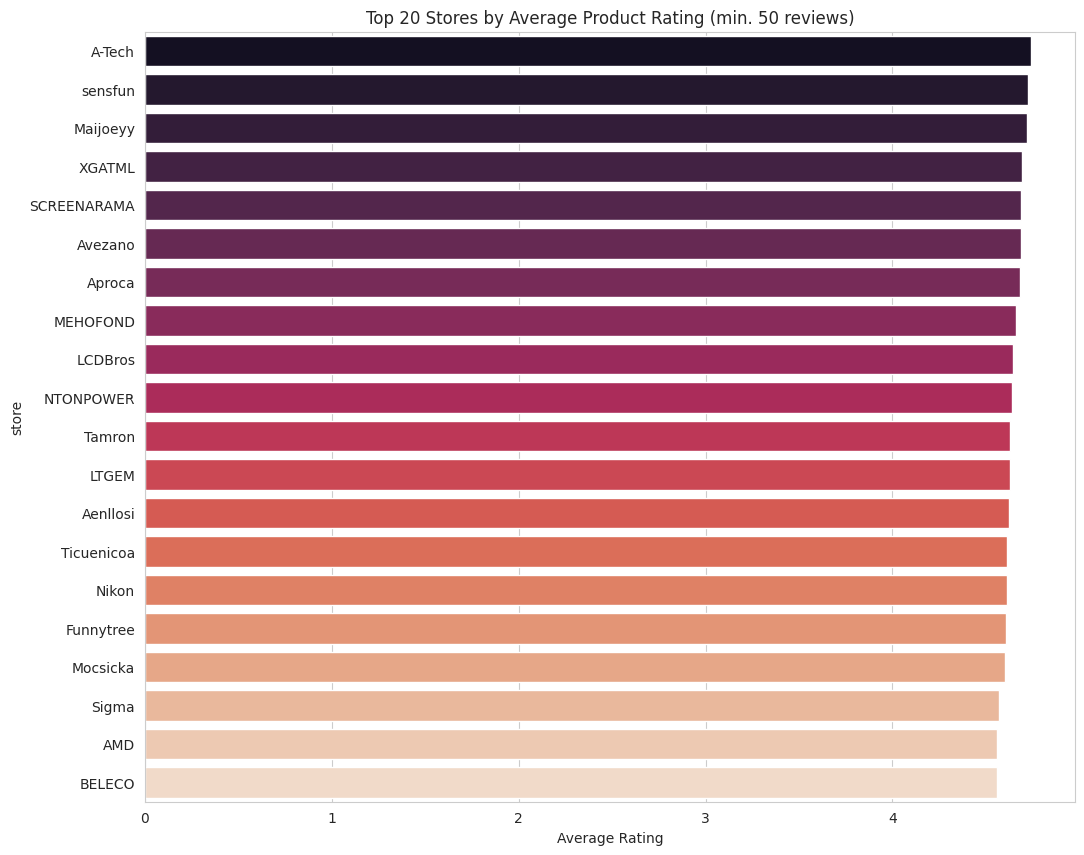

In [23]:
# First, let's find stores with a decent number of reviews to avoid bias from stores with only one or two reviews
store_review_counts = merged_df['store'].value_counts()
stores_with_enough_reviews = store_review_counts[store_review_counts > 50].index # Min 50 reviews

# Filter the data and calculate average rating
store_ratings = merged_df[merged_df['store'].isin(stores_with_enough_reviews)]
top_stores = store_ratings.groupby('store')['rating'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 10))
sns.barplot(y=top_stores.index, x=top_stores.values, palette='rocket')
plt.title('Top 20 Stores by Average Product Rating (min. 50 reviews)')
plt.xlabel('Average Rating')
plt.show()

### Positive Words in Review

Generating word cloud from a sample of 50000 reviews.


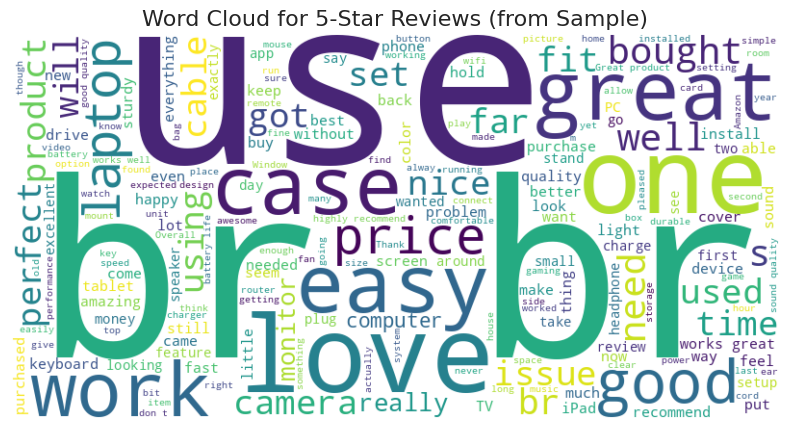

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

five_star_texts = reviews_df[reviews_df['rating'] == 5]['text'].dropna()

sample_size = 50000

if len(five_star_texts) > sample_size:
    sampled_texts = five_star_texts.sample(n=sample_size, random_state=1)
else:
    sampled_texts = five_star_texts

print(f"Generating word cloud from a sample of {len(sampled_texts)} reviews.")

# 4. Join only the sampled text into a single string
positive_text = ' '.join(sampled_texts)

# 5. Generate and display the word cloud (this part is the same)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 5-Star Reviews (from Sample)', fontsize=16)
plt.show()

### Negative Words in Review

Generating word cloud from a sample of 50000 reviews.


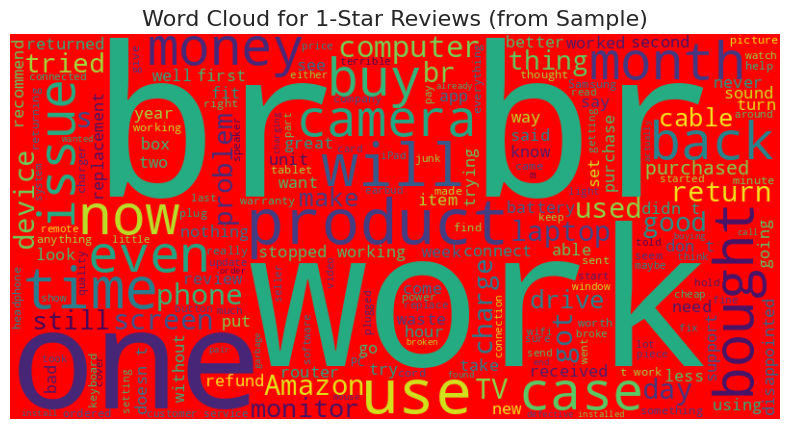

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

five_star_texts = reviews_df[reviews_df['rating'] == 1]['text'].dropna()

sample_size = 50000

if len(five_star_texts) > sample_size:
    sampled_texts = five_star_texts.sample(n=sample_size, random_state=1)
else:
    sampled_texts = five_star_texts

print(f"Generating word cloud from a sample of {len(sampled_texts)} reviews.")

# 4. Join only the sampled text into a single string
negative_text = ' '.join(sampled_texts)

# 5. Generate and display the word cloud (this part is the same)
wordcloud_pos = WordCloud(width=800, height=400, background_color='red').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 1-Star Reviews (from Sample)', fontsize=16)
plt.show()